In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv("D:\\Python_work\\exercise_data\\train.csv")

In [16]:
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# 计算总体生存率
total_survived_rate = df['Survived'].mean()
print(f"总体生存率: {total_survived_rate:.2%}")

# 按乘客等级分组计算生存率
survival_by_class = df.groupby('Pclass')['Survived'].agg(['mean', 'count'])
survival_by_class['diff_from_total'] = survival_by_class['mean'] - total_survived_rate

# 打印各等级生存率
print("\n各乘客等级生存率:")
print(survival_by_class[['mean']].rename(columns={'mean': '生存率'}).style.format("{:.2%}"))



总体生存率: 38.38%

各乘客等级生存率:



分析结果已保存为 titanic_survival_by_class.png


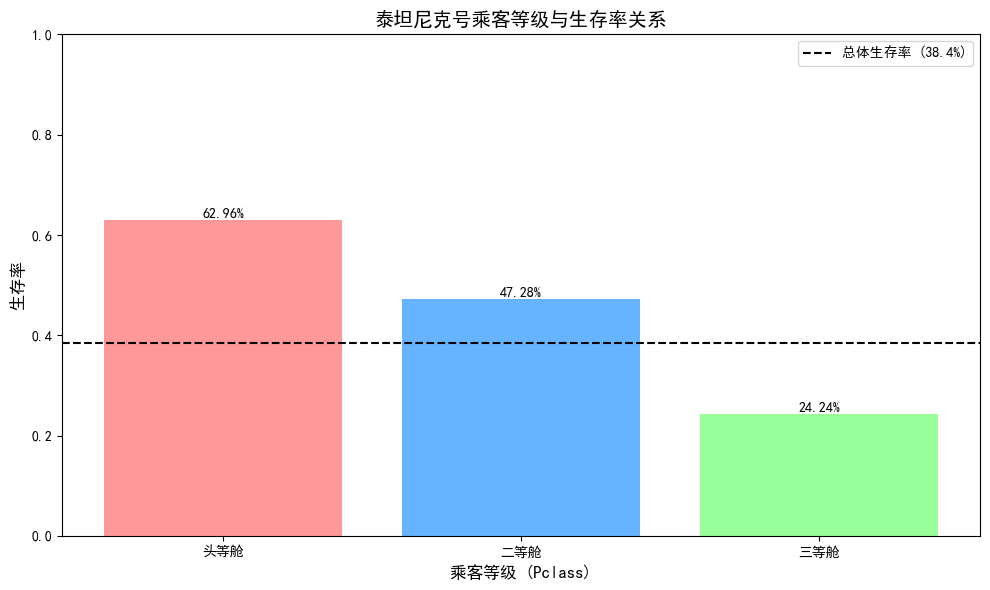

In [26]:
# 可视化
plt.figure(figsize=(10, 6))

# 柱状图展示各等级生存率
bars = plt.bar(survival_by_class.index, 
               survival_by_class['mean'], 
               color=['#ff9999','#66b3ff','#99ff99'])

# 添加总体生存率参考线
plt.axhline(y=total_survived_rate, 
            color='black', 
            linestyle='--', 
            label=f'总体生存率 ({total_survived_rate:.1%})')

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom')

# 图表装饰
plt.title('泰坦尼克号乘客等级与生存率关系', fontsize=14)
plt.xlabel('乘客等级 (Pclass)', fontsize=12)
plt.ylabel('生存率', fontsize=12)
plt.xticks([1, 2, 3], ['头等舱', '二等舱', '三等舱'])
plt.ylim(0, 1)
plt.legend()

# 保存图表
plt.tight_layout()
plt.savefig('titanic_survival_by_class.png', dpi=300)
print("\n分析结果已保存为 titanic_survival_by_class.png")



In [28]:
# 输出详细分析结果
print("\n详细分析结果:")
for pclass, row in survival_by_class.iterrows():
    print(f"\n乘客等级 {pclass} (样本数: {row['count']}):")
    print(f"- 生存率: {row['mean']:.2%}")
    print(f"- 与总体差异: {'+' if row['diff_from_total']>0 else ''}{row['diff_from_total']:.2%}")


详细分析结果:

乘客等级 1 (样本数: 216.0):
- 生存率: 62.96%
- 与总体差异: +24.58%

乘客等级 2 (样本数: 184.0):
- 生存率: 47.28%
- 与总体差异: +8.90%

乘客等级 3 (样本数: 491.0):
- 生存率: 24.24%
- 与总体差异: -14.15%
